len of probs  100


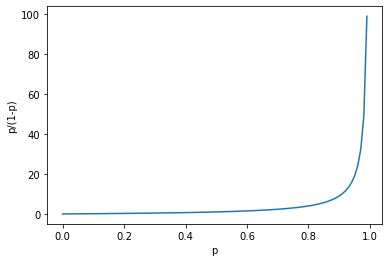

In [1]:
#logit 함수

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

##############################
#오즈비
#odds ratio
#성공확률과 실패확률의 비율을 나타내는 값
#p/(1-p) p=성공확률
#p가 0에서 1까지 증가할때 오즈비는 처음에는 천천히 증가하지만 p가 1에 가까워지면 급격히 증가
probs = np.arange(0,1,0.01)#0~1, 0.01간격으로 100개의 리스트
print('len of probs ',len(probs))

odds = [p/(1-p) for p in probs]
plt.plot(probs,odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()
##############################

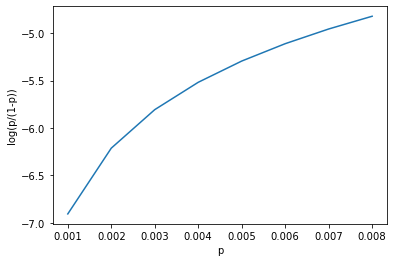

In [2]:
#logit 함수 
#오즈비에 로그 함수를 취하여 만든 함수
#log(p/(1-p)) = z
#p가 0.5일 때 0이 되고 p가 0과 1일 때 각각 무한대로 음수와 양수가 되는 특징

probs = np.arange(0.001, 0.009, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs,logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

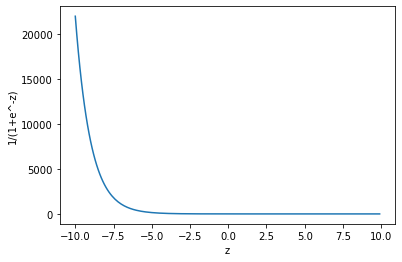

In [3]:
#log(p-(1-p)) = z
#위의 식을 z에 대해 정리한 식(로지스틱 함수, sigmoid함수라고도 함)
#logit함수의 x,y축이 바뀐 모양
#p = 1/(1+e^-z)
zs = np.arange(-10.,10.,0.1)
gs = [1/1+np.exp(-z) for z in zs]

plt.plot(zs,gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

---

In [4]:
#forge 데이터셋(임의로 생성한 데이터셋)
%matplotlib inline
from matplotlib import pyplot as plt
import mglearn
from matplotlib import font_manager, rc
#한글처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf').get_name()
rc('font', family=font_name)

X.shape: (26, 2)


/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


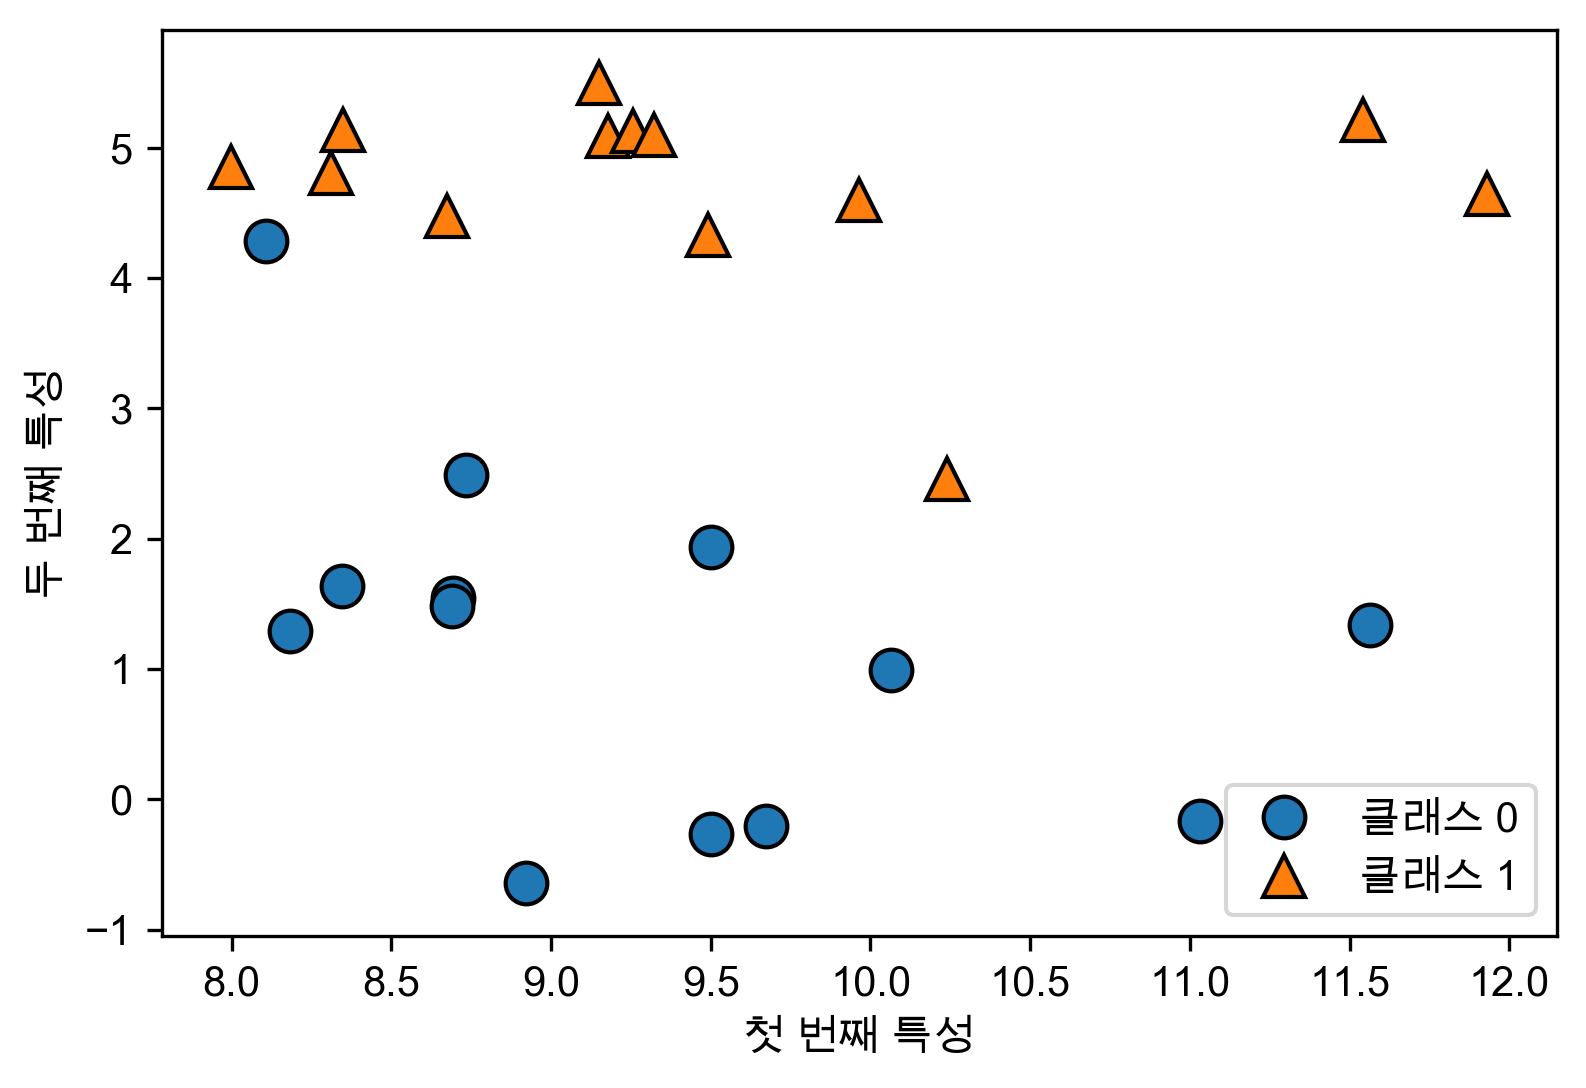

In [5]:
#로지스틱 회귀분석 1.
plt.rcParams['figure.dpi'] = 300
#forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()
#산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['클래스 0','클래스 1'], loc=4)
plt.xlabel('첫 번째 특성')
plt.ylabel('두 번째 특성')
#데이터포인트 26개와 특성 2개
print('X.shape: {}'.format(X.shape))

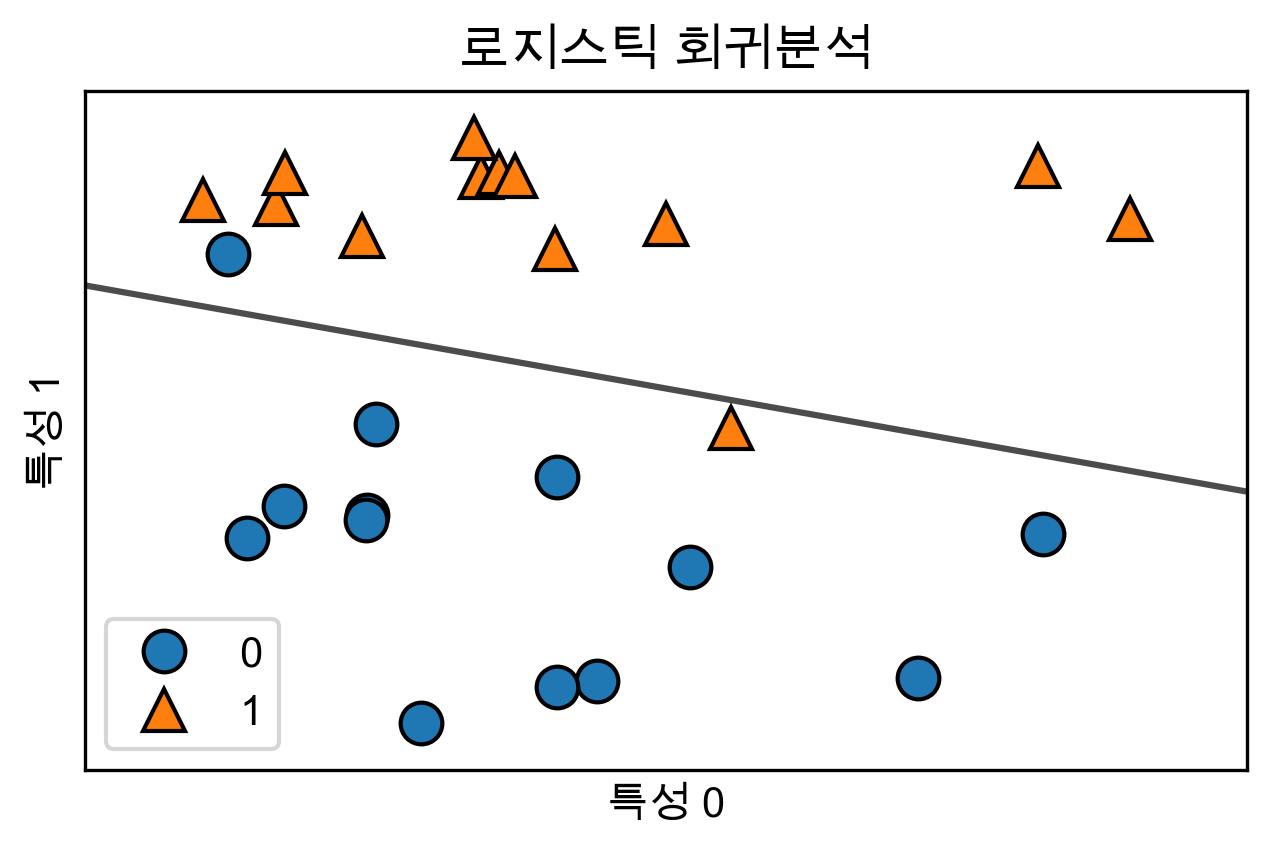

In [8]:
from sklearn.model_selection import train_test_split
#분류용 선형 모델(로지스틱 회귀)
#로지스틱 회귀분석은 회귀분석이 아니라 분류 알고리즘에 해당됨
from sklearn.linear_model import LogisticRegression
fig, axes = plt.subplots(1,1,figsize=(5,3))

model = LogisticRegression()
model = model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=axes, alpha=.7)

#산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=axes)
axes.set_title('로지스틱 회귀분석')
axes.set_xlabel('특성 0')
axes.set_ylabel('특성 1')
axes.legend()

In [9]:
#결정경계가 직선으로 표현되었고
#위쪽 클래스 1
#아래쪽 클래스 0
#새로운 데이터가 직선 위에 놓이면 클래스 1
#반대로 직선 아래쪽에 놓이면 클래스 0
#포인트 2개가 잘 못 분류됨

model.score(X,y)

0.9230769230769231

In [10]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X)
cm = confusion_matrix(y,pred) #오차행렬
cm

array([[12,  1],
       [ 1, 12]])

> confusion_matrix   
> 출처 https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score   
> ![img](https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png)
---

In [11]:
#로지스틱 함수와 모형

import numpy as np
#1원을 1년 저축 100% 이자 -> 원금 1원, 이자 1 원 -> 2원
#복리라면 1원을 6개월씩 나누어 저축, 1+0.5, 1원에 대한 이자 0.5, 0.5에 대한 이자 0.25 -> 2.25
#365일 투자하고 계속 나누어서 투자한다면 1년에 최대 2.718.... 을 얻을 수 있다

print(np.e) #오일러 상수 
print(np.exp(1)) #y=e의 1승
print(np.exp(2)) #y=e의 2승

2.718281828459045
2.718281828459045
7.38905609893065


(-0.1, 1.1)

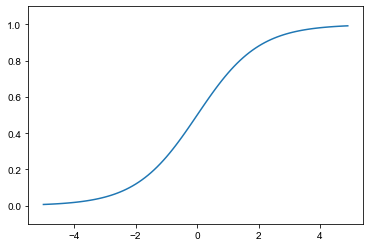

In [12]:
#로지스틱 함수는 시그모이드 함수의 일종 : s자 모양의 함수
#0.0 ~ 1.0 사이의 실수 값
%matplotlib inline
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) ) 

X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)
plt.plot(X,y)
plt.ylim(-0.1, 1.1)

In [ ]:
#n_sample : 표본 데이터의 수, 디폴드 100
#n_features : 독립 변수의 수, 디폴트20
#n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
#n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
#n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2 
#random_state : 난수 발생 시드

In [13]:
from sklearn.datasets import make_classification
import statsmodels.api as sm

X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.162261
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.7658
Time:                        15:21:54   Log-Likelihood:                -16.226
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1866      0.884      4.738      0.000       2.455       5.919


summary 해석.... ?

In [15]:
#예측값은 0.0~1.0 사이의 실수값
result = logit_res.predict(X)[:5]
#0.5이상이면 1, 미만이면 0으로 분류
for a in result:
    print(int(round(a)),end=' ')

0 1 0 1 0 

<function matplotlib.pyplot.legend(*args, **kwargs)>

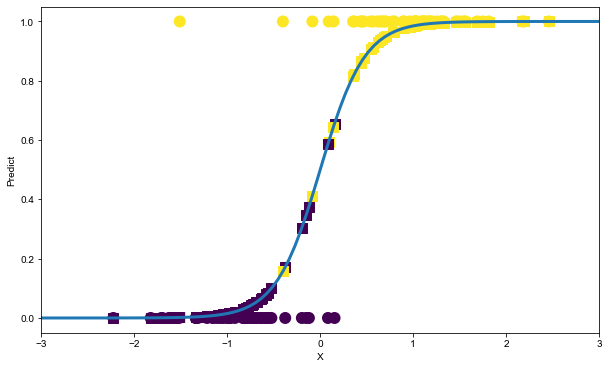

In [16]:
xx = np.linspace(-3, 3, 100)
pred = logit_res.predict(xx) #모형이 에측한 값
plt.figure(figsize=(10,6))
plt.plot(xx, pred, lw=3) #lw : line width
plt.scatter(X, y, c=y, s=100, lw=2, label='Real')
plt.scatter(X, logit_res.predict(X), label='Predict', marker='s', c=y, s=100, lw=1)
plt.xlim(-3,3)
plt.xlabel('X')
plt.ylabel('Predict')
plt.legend

In [27]:
#로지스틱 회귀 모형의 성능 측정
#log_loss() 로그 손실값(분류 모형의 성능을 평가할 때 사용하는 값)
#100%의 확률로 답을 구한 경우 -log(1.0)=0
#80% 확률 -log(0.8)=0.22314
#60% 확률 -log(0.6)=0.51082
#확률이 낮아질수록 log loss는 크게 증가한다.(확률이 낮을 때 더 많은 패널티를 부여)
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
#normalize 정규화 여부
A = log_loss(y,y_hat,normalize=False)
B = log_loss(y,y_hat,normalize=True)
print(A,B)

16.226122466352443 0.16226122466352444


In [20]:
#실제 y값의 평균
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [21]:
#y 리스트와 같은 사이즈로 값을 1로 초기화한 리스트
np.ones_like(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
#실제 y값의 평균으로 계산한 로그 손실값
y_null = np.ones_like(y) * mu_null
print(y_null)
log_loss(y, y_null, normalize=False)

[0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51]


69.29471672244784

In [28]:
#결정계수값(Pseudo R-squ.) -> 모형적합도 / coef(회귀계수)에 대한 응집도 
1 - (log_loss(y, y_hat) / log_loss(y,y_null))

0.7658389667520492

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [30]:
#사이킷런 패키지의 LogisticRegression() 함수
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
print(model.classes_) #출력값
print(model.intercept_) #절편
print(model.coef_) #회귀계수

[0 1]
[0.01210487]
[[2.99972644]]


In [32]:
#0일 확률, 1일 확률
model.predict_proba(X_test)

array([[0.00935192, 0.99064808],
       [0.00428094, 0.99571906],
       [0.98204208, 0.01795792],
       [0.11773589, 0.88226411],
       [0.10564409, 0.89435591],
       [0.94862134, 0.05137866],
       [0.9892088 , 0.0107912 ],
       [0.13379119, 0.86620881],
       [0.00138017, 0.99861983],
       [0.84331206, 0.15668794],
       [0.8996786 , 0.1003214 ],
       [0.94798802, 0.05201198],
       [0.91098884, 0.08901116],
       [0.25466241, 0.74533759],
       [0.04540992, 0.95459008],
       [0.96422105, 0.03577895],
       [0.99385324, 0.00614676],
       [0.88332811, 0.11667189],
       [0.85162766, 0.14837234],
       [0.03287681, 0.96712319]])

In [33]:
model.predict(X_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [36]:
model.score(X_test, y_test)

0.95

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[10,  0],
       [ 1,  9]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


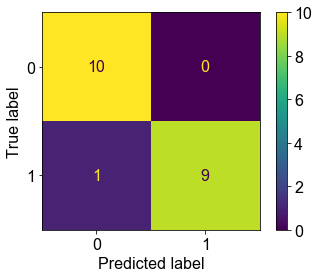

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size':16})
plot_confusion_matrix(model, X_test, y_test)